# ДЗ 7. Классификация с помощью KNN. Кластеризация K-means

## Добавление весов для соседей

К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Загружаем датасет из sklearn
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

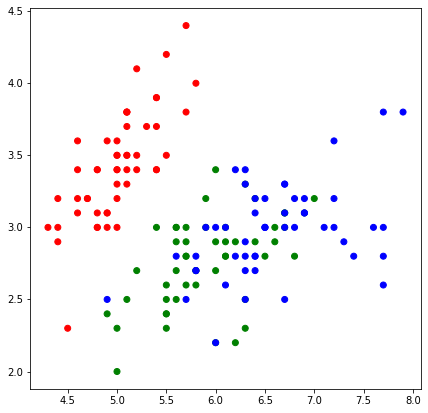

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [5]:
# Используем евклидову метрику. Реализуем функцию для ее подсчета
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
        
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [6]:
# Реализуем алгоритм поиска k ближайших соседей
def knn(x_train, y_train, x_test, k, q=1):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
            
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            # ИЗМЕНЕНИЯ ---
            # classes[d[1]] += 1
            classes[d[1]] += 1/(d[0] + q)
            # ИЗМЕНЕНИЯ ---

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [7]:
# Функция для вычисления точности
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
# График распределения классов
def get_graph(X_train, y_train, k, q):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    
    # Построим график
    Z = np.array(Z).reshape(xx.shape)    
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")    
    plt.show()

Точность алгоритма при k = 5 и q = 0.5: 0.733
(58800, 2)


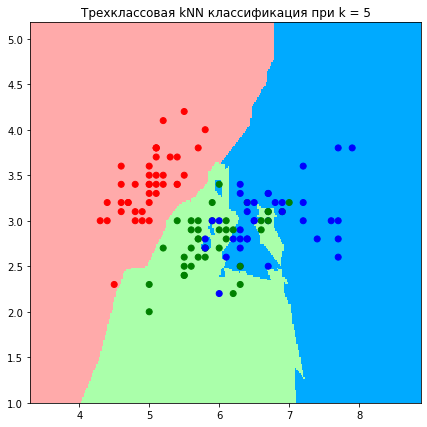

Wall time: 1min 2s


In [9]:
%%time
k = 5
q = 0.5
y_pred = knn(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k} и q = {q}: {accuracy(y_pred, y_test):.3f}')

get_graph(X_train, y_train, k, q)

Точность алгоритма при k = 10 и q = 0.1: 0.733
(58800, 2)


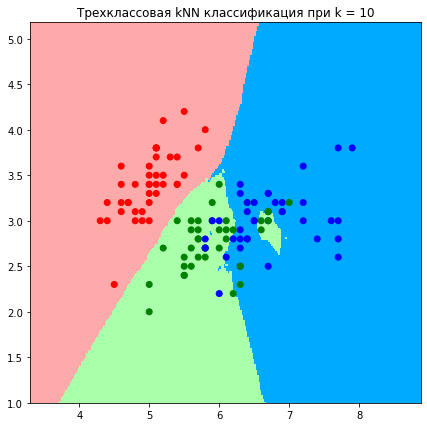

Wall time: 1min 2s


In [10]:
%%time
k = 10
q = 0.1
y_pred = knn(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k} и q = {q}: {accuracy(y_pred, y_test):.3f}')

get_graph(X_train, y_train, k, q)